<a href="https://colab.research.google.com/github/fmwashimba/Autolib-Cars/blob/main/Electric_Car_Usage_by_Autolib_Car_Sharing_Service_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment**

To investigate a claim about the blue cars charged based on the number of recharging slots released in a particular date in a particular area

To work on this assignment we will do the following analysis using python

-Find and deal with outliers, anomalies, and missing data within the dataset.
-Plot appropriate univariate and bivariate summaries recording our observations.
-Implement the solution by performing hypothesis testing. 

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm


**DATA PREPARATION**

Loading Data

In [313]:
df = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [314]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


Checking defination of columns

In [315]:
descriptions = pd.read_excel('https://bit.ly/DSCoreAutolibDatasetGlossary')
descriptions


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


Checking the type of data

In [316]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

**DATA CLEANING**

1) Removing Irrevelant Data
 


In [317]:
df.duplicated().sum()

0

Checking on the data all the given columns are useful in the Analysis.

The Dataset has 13 columns which are all necessary in the analysis therefore we proceed to the next step.

2)Removing Duplicate data

In [318]:
df.duplicated().sum()

0

And they are no duplicate data in the dataset.

3)We fix Structural errors ie long namings,incorrect word use or misspellings and columns which are not going to be used in the analysis.

In [319]:
df.rename(columns ={'Utilib_taken_sum':'WhiteCars_taken_sum','Utilib_returned_sum':'WhiteCars_returned_sum','Utilib_14_taken_sum':'RedCars_taken_sum','Utilib_14_returned_sum':'RedCars_returned_sum','n_daily_data_points':'daily_data_points'},inplace =True)
df.columns  

Index(['Postal code', 'date', 'daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'WhiteCars_taken_sum',
       'WhiteCars_returned_sum', 'RedCars_taken_sum', 'RedCars_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

4) Handling Missing Data

Checking on the missing data in the dataset.

In [320]:
df.isnull().sum()

Postal code               0
date                      0
daily_data_points         0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
WhiteCars_taken_sum       0
WhiteCars_returned_sum    0
RedCars_taken_sum         0
RedCars_returned_sum      0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There is no missing data in our dataset.

Checking on blank spaces in the dataset

In [321]:
df = df.dropna(axis=0, inplace=False)

There is no blank spaces in the dataset.

In [322]:
df.shape

(16085, 13)

5)Filtering out data Outliers and Anomalies

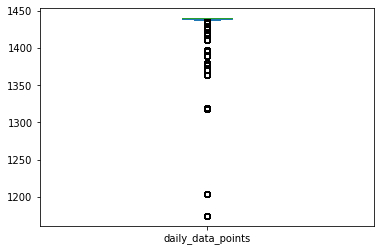

In [323]:
df[['daily_data_points']].plot(kind='box')
plt.show()

In [324]:
df['daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

6)Validating the dataSet

I have enough , clean and accurate data to work with. The data is uniformly formatted in a design or language that my analysis tools can work with

**EXPLORATORY DATA ANAYLSIS**

UNIVARIATE ANALYSIS

We will conduct the analysis on BlueCars_taken_sum and BlueCars_returned_sum

Checking on the descriptive summary 

In [325]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']]. describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000
mean,125.926951,125.912714
std,185.426579,185.501535
min,0.000000,0.000000
25%,20.000000,20.000000
50%,46.000000,46.000000
75%,135.000000,135.000000
max,1352.000000,1332.000000


Checking the skweness of the columns

In [326]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Postal code              -1.168778
daily_data_points        -5.742776
dayOfWeek                 0.018824
BlueCars_taken_sum        2.406355
BlueCars_returned_sum     2.412085
WhiteCars_taken_sum       2.556872
WhiteCars_returned_sum    2.578665
RedCars_taken_sum         2.510924
RedCars_returned_sum      2.511488
Slots_freed_sum           2.597406
Slots_taken_sum           2.596904
dtype: float64

There is a high perctange of positive skewness in the columns.

Plot our numerical variables to find more information about our data in a histogram

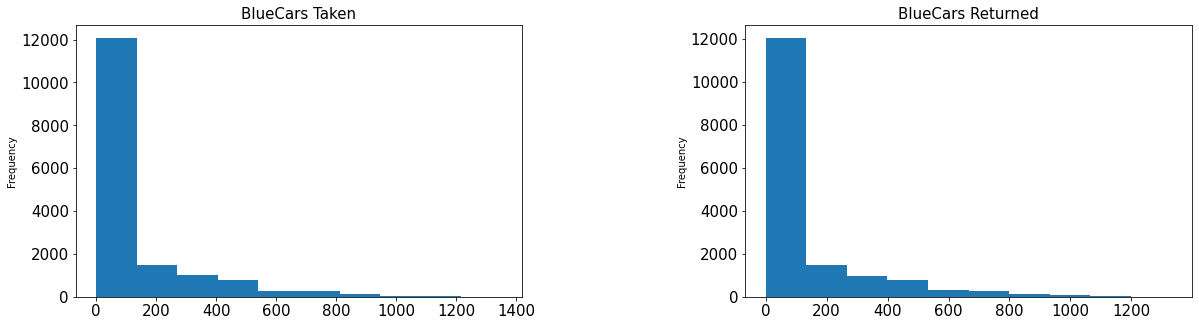

In [327]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['BlueCars_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)


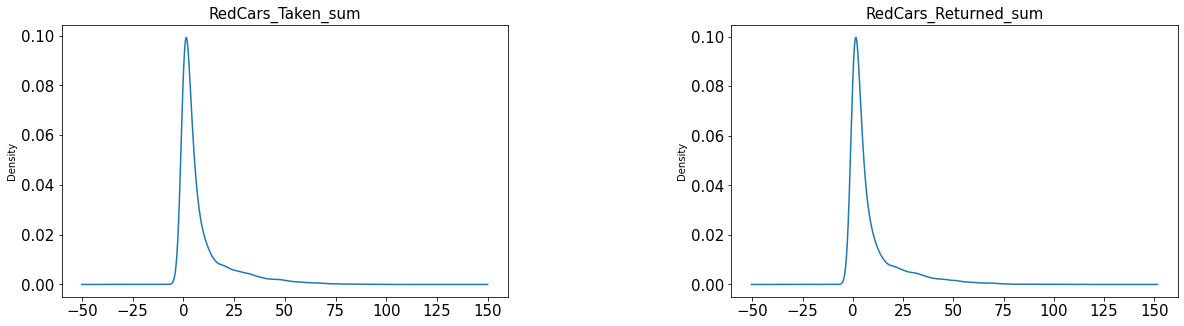

In [328]:
fig, axarr = plt.subplots(1, 2,figsize=(20, 5))
df['RedCars_taken_sum'].plot(kind='density', ax=axarr[0], fontsize=15).set_title("RedCars_Taken_sum", fontsize=15)
df['RedCars_returned_sum'].plot( kind='density',ax=axarr[1], fontsize=15 ).set_title("RedCars_Returned_sum", fontsize=15) 
plt.subplots_adjust(wspace=.5)


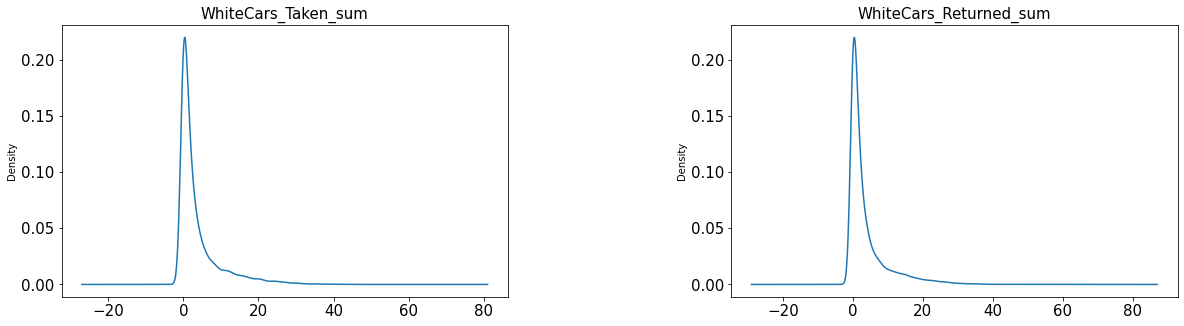

In [329]:
fig, axarr = plt.subplots(1, 2,figsize=(20, 5))
df['WhiteCars_taken_sum'].plot(kind='density', ax=axarr[0], fontsize=15).set_title("WhiteCars_Taken_sum", fontsize=15)
df['WhiteCars_returned_sum'].plot( kind='density',ax=axarr[1], fontsize=15 ).set_title("WhiteCars_Returned_sum", fontsize=15) 
plt.subplots_adjust(wspace=.5)

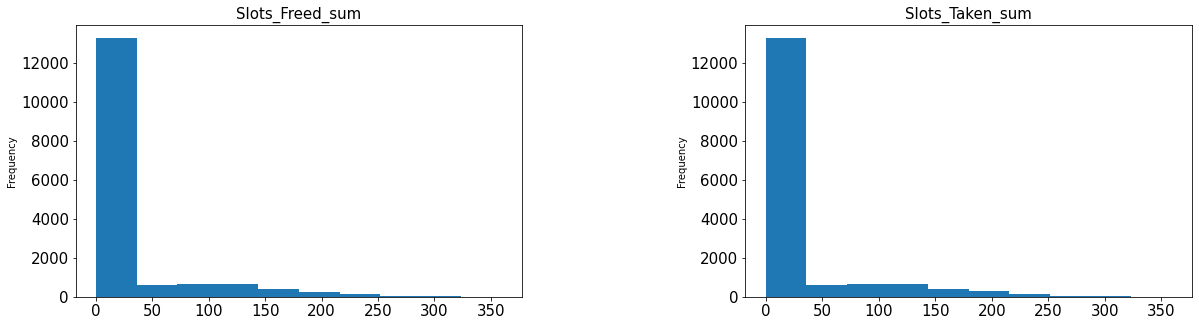

In [330]:
fig, axarr = plt.subplots(1, 2,figsize=(20, 5))
df['Slots_freed_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("Slots_Freed_sum", fontsize=15)
df['Slots_taken_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("Slots_Taken_sum", fontsize=15) 
plt.subplots_adjust(wspace=.5)

Checking on the Kurtosis of our Columns

In [331]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Postal code               -0.542143
daily_data_points         36.594846
dayOfWeek                 -1.260994
BlueCars_taken_sum         6.172692
BlueCars_returned_sum      6.186288
WhiteCars_taken_sum        7.702362
WhiteCars_returned_sum     7.936357
RedCars_taken_sum          7.186815
RedCars_returned_sum       7.185463
Slots_freed_sum            6.454514
Slots_taken_sum            6.442553
dtype: float64

We observe that most of the columns are leptokuritc with two of them being platykurtic.

Checking data on the day of the week

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


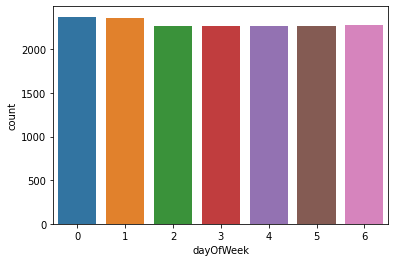

In [332]:
sns.countplot(df['dayOfWeek'])

We see that Monday and Tuesday have the highest count followed by the rest of the days. It is important to note that there is no much differnce.

Finding the frequency of the services in the day type

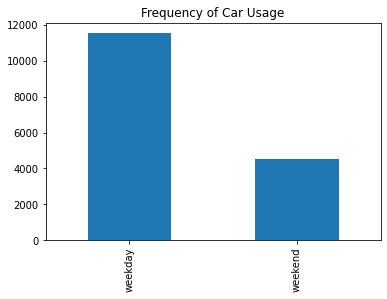

In [333]:
df['day_type'].value_counts().plot.bar(title='Frequency of Car Usage')

We note that during weekdays the company is busy compared to weekend. 

We will check how the vehicles were taken and returned on each day of the week by creating subplots.

Blue cars

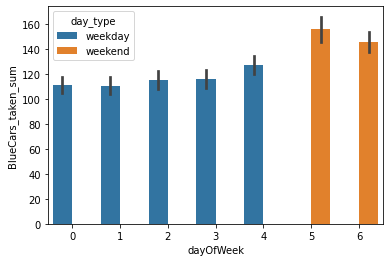

In [334]:
sns.barplot(x='dayOfWeek', y='BlueCars_taken_sum', hue ='day_type', data = df)

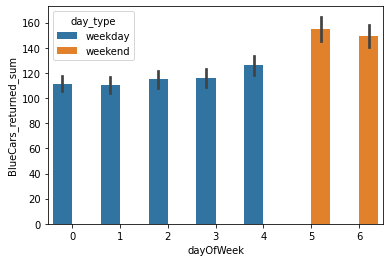

In [335]:
sns.barplot(x='dayOfWeek', y='BlueCars_returned_sum', hue ='day_type', data = df)


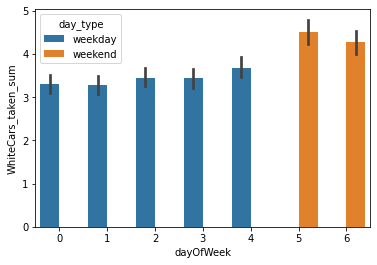

In [336]:
sns.barplot(x='dayOfWeek', y='WhiteCars_taken_sum', hue ='day_type', data = df)

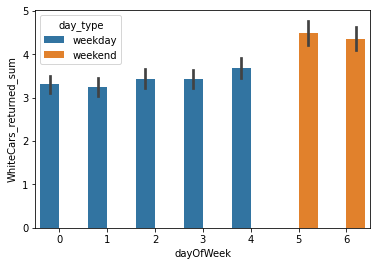

In [337]:
sns.barplot(x='dayOfWeek', y='WhiteCars_returned_sum', hue ='day_type', data = df)

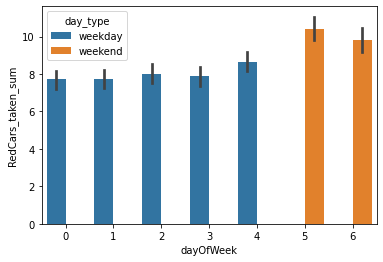

In [338]:
sns.barplot(x='dayOfWeek', y='RedCars_taken_sum', hue ='day_type', data = df)

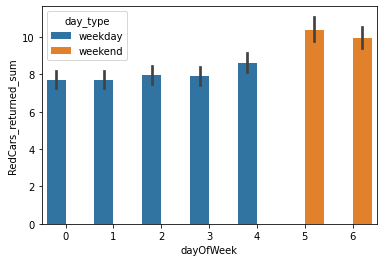

In [339]:
sns.barplot(x='dayOfWeek', y='RedCars_returned_sum', hue ='day_type', data = df)

From the observation above there is more usage of the blue cars for this car sharing company.

**Bivariate Analysis**

We start by checking the Correlation Matrix of each Column 

In [340]:
Corcoff=df.corr()
Corcoff

,Postal code,daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,WhiteCars_taken_sum,WhiteCars_returned_sum,RedCars_taken_sum,RedCars_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
WhiteCars_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
WhiteCars_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
RedCars_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
RedCars_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


From the observation above there is a strong correlation between the cars usage and the slots freed sum and slots taken sum 

There is almost zero correlation between the cars usage and the daily data points.

There is a negative strong correlation between car usage and the location or postal code.

There is no correlation between the location postal code and day of the week.

Text(0.5, 1.0, 'Taken Charging Slots')

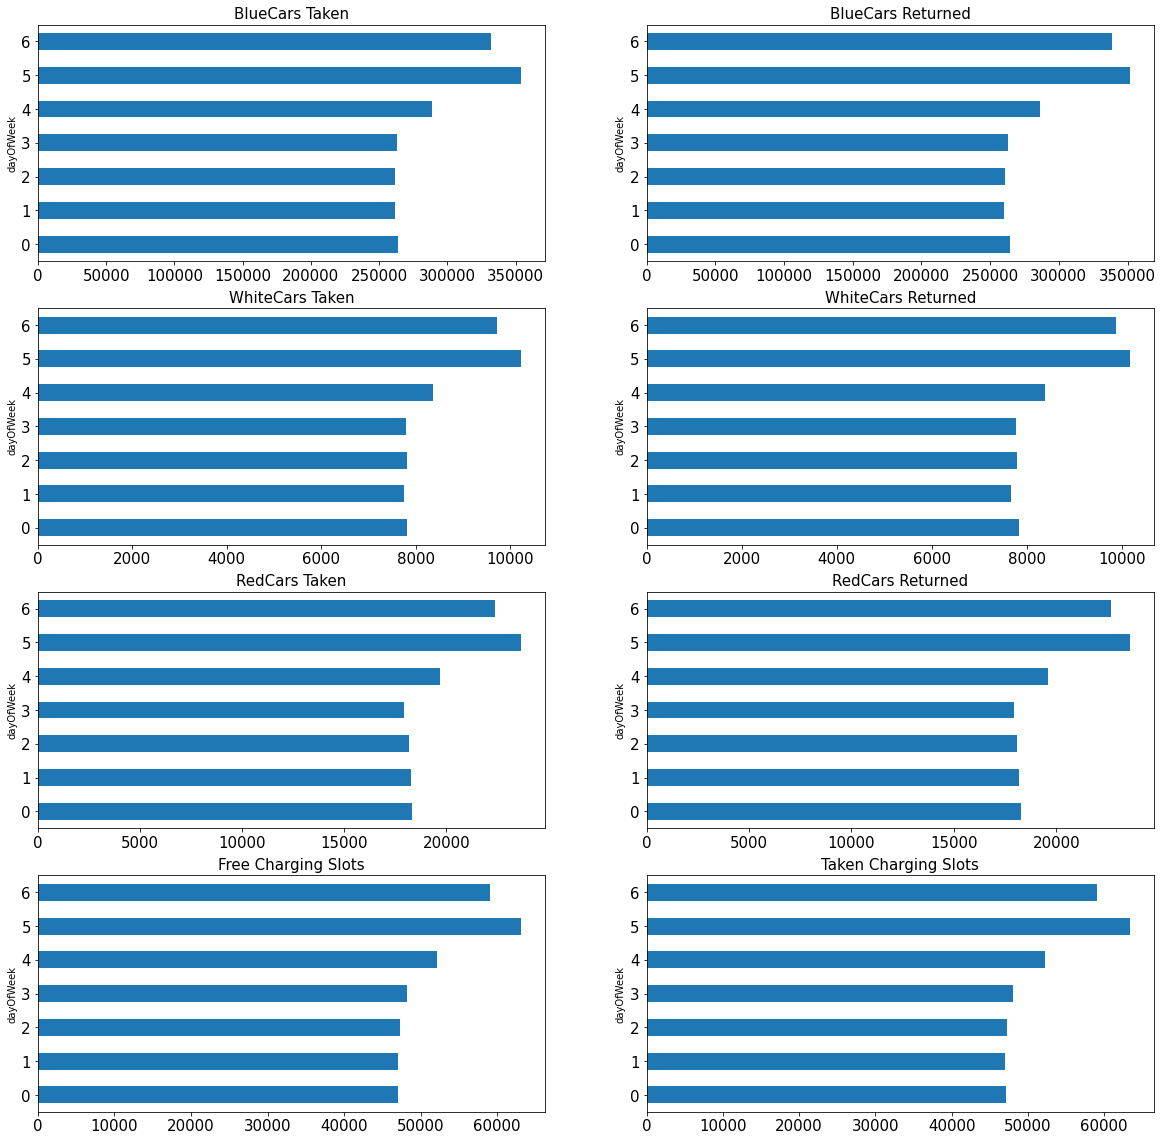

In [341]:
fig, axarr = plt.subplots(4, 2, figsize=(20, 20))
df.groupby(['dayOfWeek'])['BlueCars_taken_sum'].sum().plot(kind='barh', ax=axarr[0][0],fontsize=15).set_title("BlueCars Taken", fontsize=15)
df.groupby(['dayOfWeek'])['BlueCars_returned_sum'].sum().plot( kind='barh',ax=axarr[0][1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
df.groupby(['dayOfWeek'])['WhiteCars_taken_sum'].sum().plot.barh(ax=axarr[1][0], fontsize=15 ).set_title("WhiteCars Taken", fontsize=15) 
df.groupby(['dayOfWeek'])['WhiteCars_returned_sum'].sum().plot( kind='barh',ax=axarr[1][1], fontsize=15 ).set_title("WhiteCars Returned", fontsize=15) 
df.groupby(['dayOfWeek'])['RedCars_taken_sum'].sum().plot( kind='barh',ax=axarr[2][0], fontsize=15 ).set_title("RedCars Taken", fontsize=15) 
df.groupby(['dayOfWeek'])['RedCars_returned_sum'].sum().plot( kind='barh',ax=axarr[2][1], fontsize=15 ).set_title("RedCars Returned", fontsize=15) 
df.groupby(['dayOfWeek'])['Slots_freed_sum'].sum().plot( kind='barh',ax=axarr[3][0], fontsize=15 ).set_title("Free Charging Slots", fontsize=15) 
df.groupby(['dayOfWeek'])['Slots_taken_sum'].sum().plot( kind='barh',ax=axarr[3][1], fontsize=15 ).set_title("Taken Charging Slots", fontsize=15) 


My Observation from above is that though there is an even distribution vehcile usage of all vehicles during the weekday and weekend but the bluesCars are being used more compared to other vehicles.

The Charging slots are more busier during the weekend in equal measure comapred to weekdays

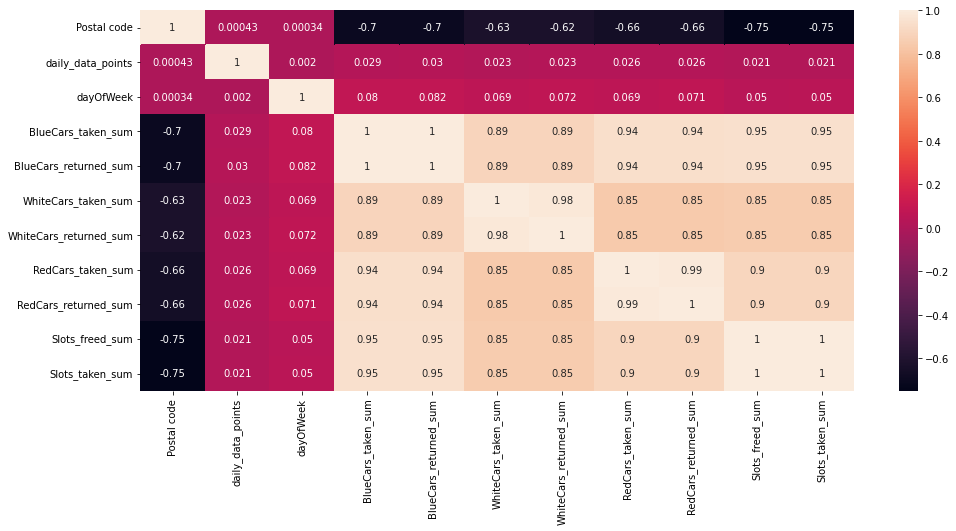

In [342]:
plt.figure(figsize = (16,7))
sns.heatmap(df.corr (), annot=True)

Pairing the plot and correlation Matrix.

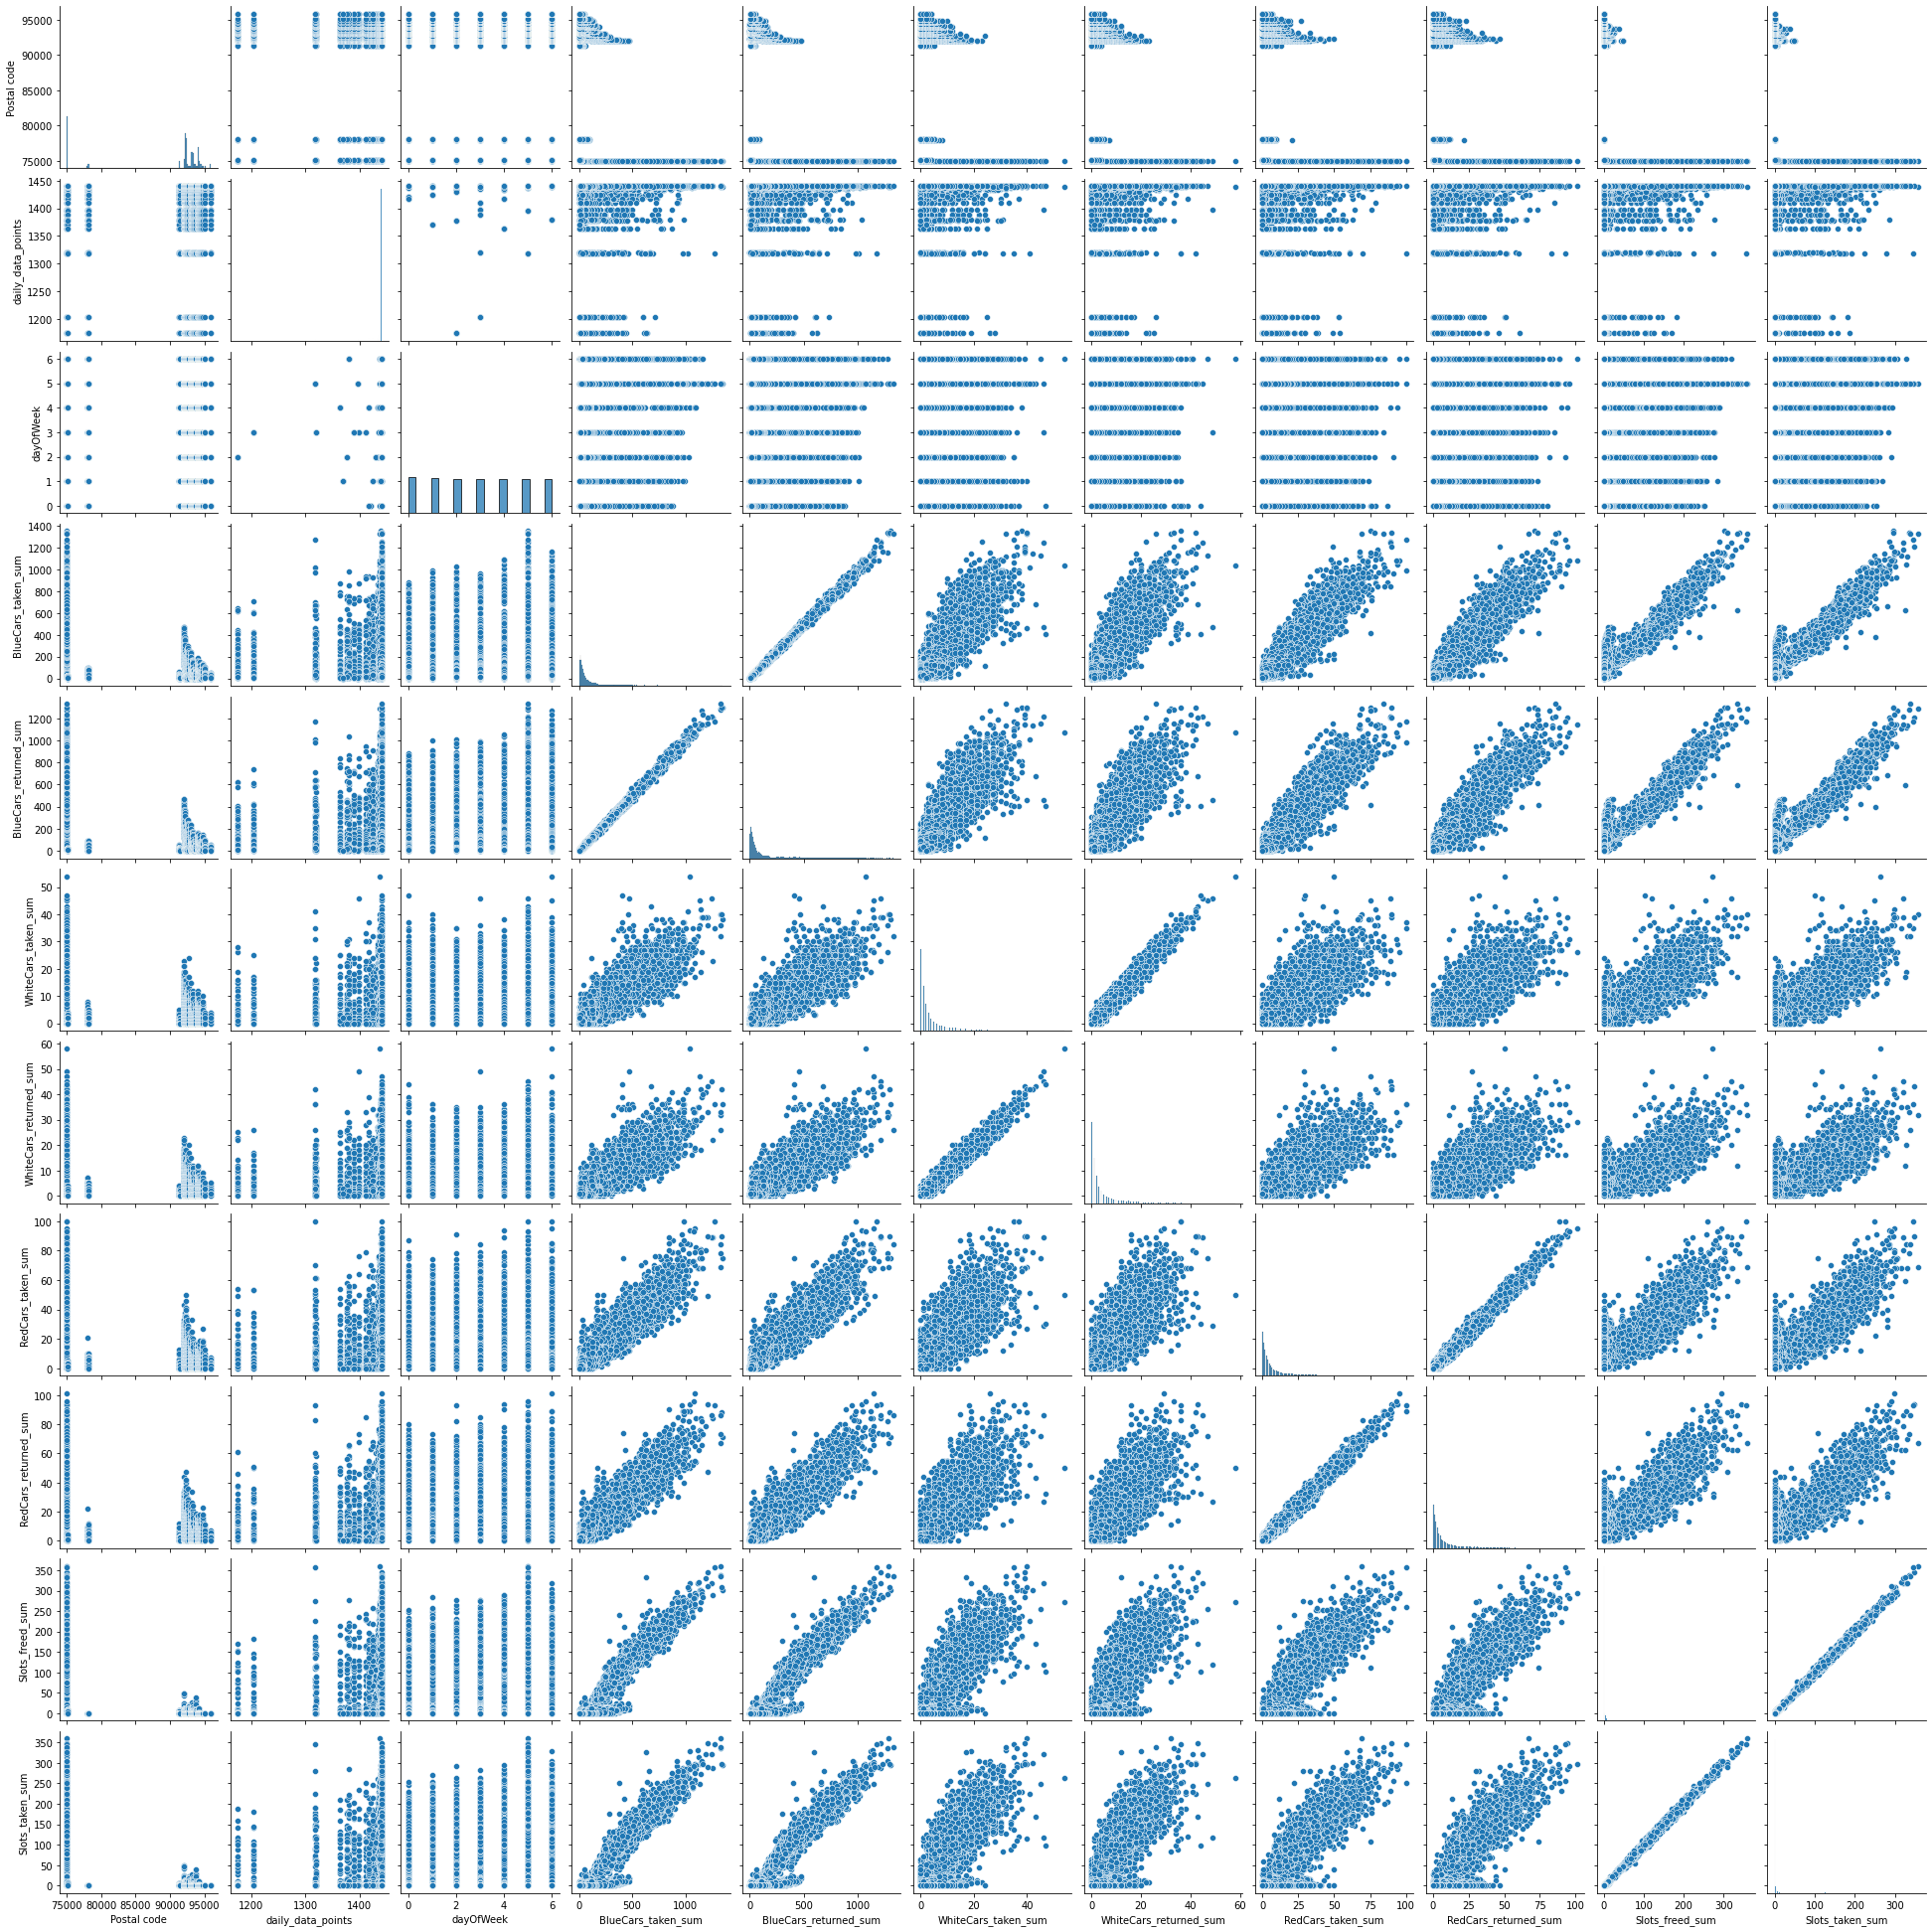

In [343]:
sns.pairplot(df)
plt.show()

**Hypothesis Testing **

We want to look at the relationship between bluecars taken in two postal areas of interest which are 75015 and 75017. we will use the random sampling method to group our population so that we can easily analyze it. We will extract data from the postal codes 75015 and 75017. These two postal codes will form our clusters whereby we can come up with our hypothesis claim.

We will extract data from postal code 75015 and 75017

In [344]:
df['Postal code'].value_counts()

75001    156
92700    156
93350    156
93310    156
93260    156
        ... 
93440    151
93370    149
92340    147
93200    126
93390     84
Name: Postal code, Length: 104, dtype: int64

In [345]:
#get the value counts of the day of week
df['dayOfWeek'].value_counts()

0    2374
1    2363
6    2274
4    2271
2    2268
3    2268
5    2267
Name: dayOfWeek, dtype: int64

In [346]:
# generate a sample from the df dataset where we choose a 10% inclusion.
strat_output= df.groupby(['Postal code','dayOfWeek'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
# Check the stratified output
print(strat_output['Postal code'].value_counts())
print(strat_output['dayOfWeek'].value_counts())

75001    14
93110    14
93360    14
93350    14
93310    14
         ..
92120    14
92110    14
92100    14
92000    14
93390     7
Name: Postal code, Length: 104, dtype: int64
0    207
1    207
2    207
3    207
4    207
5    207
6    207
Name: dayOfWeek, dtype: int64


In [347]:
# get our sample shape
strat_output.shape

(1449, 13)

We have a sample of size n = 1449. We then get the columns we need.


In [348]:
#get the columns we want to work with
strat_new = strat_output[['Postal code', 'dayOfWeek', 'daily_data_points', 'day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum']]
strat_new

,Postal code,dayOfWeek,daily_data_points,day_type,BlueCars_taken_sum,BlueCars_returned_sum
21,75001,0,1440,weekday,123,116
35,75001,0,1440,weekday,121,121
124,75001,1,1425,weekday,157,156
1,75001,1,1438,weekday,98,94
9,75001,2,1440,weekday,88,85
...,...,...,...,...,...,...
16049,95880,4,1435,weekday,19,20
15987,95880,5,1440,weekend,18,21
15962,95880,5,1438,weekend,46,53
15977,95880,6,1438,weekend,36,38


In [350]:
# point estimation of the mean
np.random.seed(6)
# Sample 1000 values
sample_bluecars = np.random.choice(a= strat_new['BlueCars_taken_sum'],
                               size=8000)            

# Show sample mean
print ( sample_bluecars.mean() )                         

# calculate how much the estimated mean differs from the main mean
df['BlueCars_taken_sum'].mean() - sample_bluecars.mean()

125.454875


0.4720755750699368

Population Values

Find the population mean and standard deviation of sum of bluecars taken (BlueCars_taken_sum) and returned.

In [351]:
#both taken and returned
df[['BlueCars_taken_sum', 'BlueCars_returned_sum']].mean()

BlueCars_taken_sum       125.926951
BlueCars_returned_sum    125.912714
dtype: float64

In [358]:
# rounding off mean
pop_mean = round(df['BlueCars_taken_sum'].mean(), 4)
pop_mean

125.927

In [353]:
#both taken and returned
df[['BlueCars_taken_sum', 'BlueCars_returned_sum']].std()

BlueCars_taken_sum       185.426579
BlueCars_returned_sum    185.501535
dtype: float64

In [359]:
# rounding off standard deviation
pop_std = round(df['BlueCars_taken_sum'].std(), 4)
pop_std

185.4266

SAmple Values

In [355]:
# both taken and returned
strat_new[['BlueCars_taken_sum', 'BlueCars_returned_sum']].mean()

BlueCars_taken_sum       125.158040
BlueCars_returned_sum    124.966874
dtype: float64

In [361]:
# rounding off sample mean
samp_mean = round(strat_new['BlueCars_taken_sum'].mean(), 4)
samp_mean

125.158

In [356]:
# both taken and returned
strat_new[['BlueCars_taken_sum', 'BlueCars_returned_sum']].std()

BlueCars_taken_sum       185.908258
BlueCars_returned_sum    185.850279
dtype: float64

In [363]:
# rounding off sample standard deviation
samp_std = round(strat_new['BlueCars_taken_sum'].std(), 4)
samp_std

185.9083

Z-TEST

We will do a Z-score test because the population is more than 30.

Formula to find the z score is (sample mean - population mean)/ population standard deviation

We will use an alpha( significance level) of 0.05


Calculate the z-score


In [364]:

alpha_z = 0.05
zscore =(samp_mean - pop_mean)/ pop_std
zscore

-0.004147193552597121

Find the p-value

In [365]:

prob = round(1 - stats.norm.cdf(zscore), 4)
prob

0.5017

Interpret via p value

In [366]:

if prob > alpha_z:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


CONCLUSION 

**Z-TEST**

The p value of 0.5004 is greater than the initial alpha level of -0.004. This p-value tells us the probability of getting this z-score if the null hypothesis is true. Therefore, there is sufficient evidence to reject the null hypothesis. That the population mean is equal to 125.927.

**HYPOTHESIS REPORT**

https://docs.google.com/document/d/1cU7xeVgzykPBketaYcs4FQLUViGlxSIksX0JzuN2L4k/edit?usp=sharing